In [14]:
import pandas as pd
from sklearn.cross_validation import train_test_split

my_file = pd.read_json("F:/graduate study/semester2/660/final project/train.json")
#test_file = pd.read_json("F:/graduate study/semester2/660/final project/test.json")
my_data = pd.DataFrame(my_file)
# train_data.head()
my_data['interest_level'] = my_data['interest_level'].map({'low': -1, 'medium': 0,'high':1})
my_data[:4]
my_data = my_data[["bathrooms","bedrooms","price","interest_level"]]
my_data.head()

,bathrooms,bedrooms,price,interest_level
10,1.5,3,3000,0
10000,1.0,2,5465,-1
100004,1.0,1,2850,1
100007,1.0,1,3275,-1
100013,1.0,4,3350,-1


                bathrooms  bedrooms     price  interest_level
bathrooms        1.000000  0.533446  0.069661       -0.082573
bedrooms         0.533446  1.000000  0.051788        0.027293
price            0.069661  0.051788  1.000000       -0.023783
interest_level  -0.082573  0.027293 -0.023783        1.000000


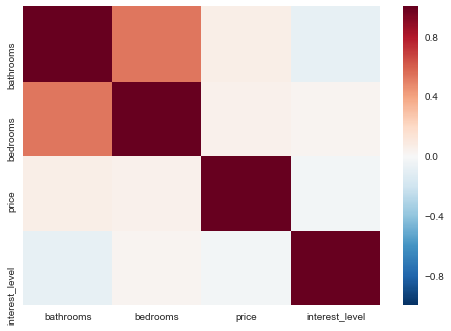

In [21]:
corr_matx = my_data.corr()
print(corr_matx)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matx)
plt.show()

In [22]:
train_data,test_data = train_test_split(my_data,test_size = 0.4)
# train_data.head()
# test_data.head()
y_train = train_data["interest_level"].values
#y_train[:4]
x_train = train_data[["bathrooms","bedrooms","price"]]
#x_train[:4]
y_test = train_data["interest_level"].values
x_test= train_data[["bathrooms","bedrooms","price"]]

kNN AUC =  0.545037028039


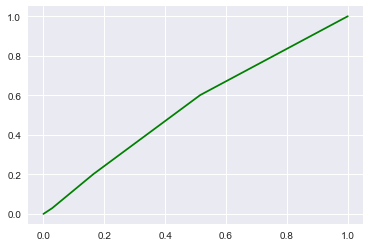

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(x_train,y_train )
predicted = kNN.predict (x_test)
probs = kNN.predict_proba(x_test)
#probs

from sklearn import metrics
import matplotlib.pyplot as plt
% matplotlib inline

fpr, tpr, thresholds = metrics.roc_curve(y_test,kNN.predict_proba(x_test)
[:,1],pos_label=1)
plt.plot(fpr,tpr,color = "green")
print ("kNN AUC = ", metrics.auc(fpr,tpr))

NB auc =  0.400426398164


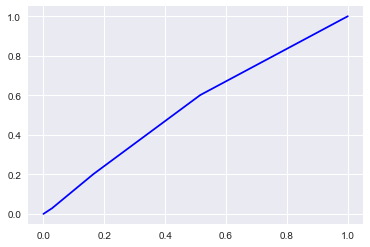

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predicted = gnb.predict(x_test)
probs = gnb.predict_proba(x_test)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, probs[:, 1], pos_label=1)
plt.plot(fpr,tpr, color="blue")
print("NB auc = ", metrics.auc(fpr2, tpr2))

D:\anaconda\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


LogisticRegression auc =  0.719518120359


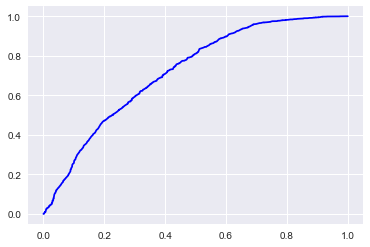

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
probs = model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1], pos_label=1)
plt.plot(fpr,tpr, color="blue")
print("LogisticRegression auc = ", metrics.auc(fpr, tpr))